# PROSPER LOAN ANALYSIS

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.pyplot import xticks


In [3]:
df=pd.read_csv('prosperLoanData.csv')

In [4]:
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

**What is the structure of this dataset?**
data set contains 113,937 rows and 81 variables on each loan, including loan amount,  interest rate, current loan status and many others.

For better understanding of the visualization I have looked at only few variables .

**What is/are the main feature(s) of interest in your dataset?**
My main focus is to figure out what features are best for predicting the Loan outcome in the dataset.

**What features in the dataset do you think will help support your investigation into your feature(s) of interest?**
I think that loan will have influence on borrower like occupation, income , whether he is with homeown status and prosper rating.

In [6]:
k=df.columns
k

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

**What are number of variables ?**

In [7]:
len(k)

81

In [8]:
df.isnull().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [9]:
column_loan = ['Term' , 
        'LoanStatus', 
        'EstimatedEffectiveYield' , 
        'BorrowerState',
        'BorrowerAPR' , 
        'BorrowerRate' , 
        'ProsperRating (numeric)',
        'ProsperRating (Alpha)',
        'ProsperScore',                     
        'ListingCategory (numeric)', 
        'EmploymentStatus',
        'Occupation', 
        'EmploymentStatusDuration', 
        'IsBorrowerHomeowner', 
        'IncomeVerifiable', 
        'StatedMonthlyIncome', 
        'MonthlyLoanPayment',
        'Recommendations', 
        'DebtToIncomeRatio',
        'LoanOriginalAmount' ,
        'PercentFunded',
        'IncomeRange',
        'Investors'
        ]

In [10]:
df_loan=df[column_loan]

In [11]:
df_loan.head()

,Term,LoanStatus,EstimatedEffectiveYield,BorrowerState,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),...,IsBorrowerHomeowner,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,IncomeRange,Investors
0,36,Completed,NaN,CO,0.16516,0.1580,NaN,NaN,NaN,0,...,True,True,3083.333333,330.43,0,0.17,9425,1.0,"$25,000-49,999",258
1,36,Current,0.07960,CO,0.12016,0.0920,6.0,A,7.0,2,...,False,True,6125.000000,318.93,0,0.18,10000,1.0,"$50,000-74,999",1
2,36,Completed,NaN,GA,0.28269,0.2750,NaN,NaN,NaN,0,...,False,True,2083.333333,123.32,0,0.06,3001,1.0,Not displayed,41
3,36,Current,0.08490,GA,0.12528,0.0974,6.0,A,9.0,16,...,True,True,2875.000000,321.45,0,0.15,10000,1.0,"$25,000-49,999",158
4,36,Current,0.18316,MN,0.24614,0.2085,3.0,D,4.0,2,...,True,True,9583.333333,563.97,0,0.26,15000,1.0,"$100,000+",20


In [12]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
Term                         113937 non-null int64
LoanStatus                   113937 non-null object
EstimatedEffectiveYield      84853 non-null float64
BorrowerState                108422 non-null object
BorrowerAPR                  113912 non-null float64
BorrowerRate                 113937 non-null float64
ProsperRating (numeric)      84853 non-null float64
ProsperRating (Alpha)        84853 non-null object
ProsperScore                 84853 non-null float64
ListingCategory (numeric)    113937 non-null int64
EmploymentStatus             111682 non-null object
Occupation                   110349 non-null object
EmploymentStatusDuration     106312 non-null float64
IsBorrowerHomeowner          113937 non-null bool
IncomeVerifiable             113937 non-null bool
StatedMonthlyIncome          113937 non-null float64
MonthlyLoanPayment           113937 non-null float64
Recomme

**Drop null Charectors**

In [13]:
df_loan.dropna(inplace=True)

C:\Users\Pragati mehra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
df_loan.describe()

,Term,EstimatedEffectiveYield,BorrowerAPR,BorrowerRate,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,Investors
count,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000,76216.000000
mean,42.760470,0.166738,0.223901,0.193621,4.132413,6.080246,3.302259,104.578028,6002.833586,296.421859,0.016571,0.258032,9294.999410,0.998131,69.998517
std,11.744005,0.067595,0.079372,0.074088,1.661460,2.360640,4.396670,95.836443,5110.743506,189.674943,0.187732,0.320587,6413.404265,0.020572,97.801415
min,12.000000,-0.181600,0.045830,0.040000,1.000000,1.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,1000.000000,0.700000,1.000000
25%,36.000000,0.114800,0.161570,0.134900,3.000000,4.000000,1.000000,32.000000,3583.333333,159.062500,0.000000,0.150000,4000.000000,1.000000,1.000000
50%,36.000000,0.157670,0.215660,0.184500,4.000000,6.000000,1.000000,76.000000,5041.666667,257.760000,0.000000,0.220000,8000.000000,1.000000,32.000000
75%,60.000000,0.219000,0.287800,0.254900,5.000000,8.000000,3.000000,150.000000,7250.000000,392.420000,0.000000,0.320000,14603.250000,1.000000,100.000000
max,60.000000,0.319900,0.423950,0.360000,7.000000,11.000000,20.000000,755.000000,483333.333333,2251.510000,19.000000,10.010000,35000.000000,1.012500,1189.000000


In [15]:

df_loan.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_A', 
                        'ProsperRating (numeric)': 'ProsperRating_N',
                        'ListingCategory (numeric)' : 'ListingCategory_N'
                       }, inplace=True)

C:\Users\Pragati mehra\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [16]:
df_loan.columns

Index(['Term', 'LoanStatus', 'EstimatedEffectiveYield', 'BorrowerState',
       'BorrowerAPR', 'BorrowerRate', 'ProsperRating_N', 'ProsperRating_A',
       'ProsperScore', 'ListingCategory_N', 'EmploymentStatus', 'Occupation',
       'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'IncomeVerifiable',
       'StatedMonthlyIncome', 'MonthlyLoanPayment', 'Recommendations',
       'DebtToIncomeRatio', 'LoanOriginalAmount', 'PercentFunded',
       'IncomeRange', 'Investors'],
      dtype='object')

## Univariate##
**BELOW VISUALISED GRAPH ARE CATEGORY ATTRIBUTES**

In [17]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76216 entries, 1 to 113936
Data columns (total 23 columns):
Term                        76216 non-null int64
LoanStatus                  76216 non-null object
EstimatedEffectiveYield     76216 non-null float64
BorrowerState               76216 non-null object
BorrowerAPR                 76216 non-null float64
BorrowerRate                76216 non-null float64
ProsperRating_N             76216 non-null float64
ProsperRating_A             76216 non-null object
ProsperScore                76216 non-null float64
ListingCategory_N           76216 non-null int64
EmploymentStatus            76216 non-null object
Occupation                  76216 non-null object
EmploymentStatusDuration    76216 non-null float64
IsBorrowerHomeowner         76216 non-null bool
IncomeVerifiable            76216 non-null bool
StatedMonthlyIncome         76216 non-null float64
MonthlyLoanPayment          76216 non-null float64
Recommendations             76216 non-

In [18]:
df_loan.ProsperRating_A.value_counts()

C     16499
B     14379
A     13490
D     12629
E      8443
HR     5680
AA     5096
Name: ProsperRating_A, dtype: int64

In [19]:
df_loan.IncomeRange.value_counts()

$50,000-74,999    23692
$25,000-49,999    21421
$100,000+         13977
$75,000-99,999    13547
$1-24,999          3578
Not employed          1
Name: IncomeRange, dtype: int64

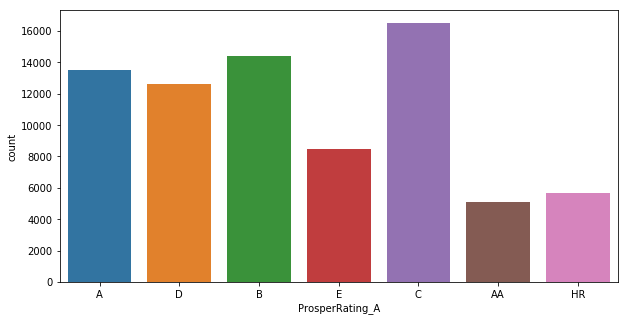

In [20]:
plt.figure(figsize = [10, 5]) 
sb.countplot(data = df_loan, x = 'ProsperRating_A');

 observation **Prosperrating is shown here which concludes that C has the maximum Prosperating the least one in this is AA**

In [21]:
df_loan.LoanStatus.value_counts()

Current                   51170
Completed                 17687
Chargedoff                 4444
Defaulted                   885
Past Due (1-15 days)        714
Past Due (31-60 days)       322
Past Due (91-120 days)      277
Past Due (61-90 days)       275
Past Due (16-30 days)       241
FinalPaymentInProgress      187
Past Due (>120 days)         14
Name: LoanStatus, dtype: int64

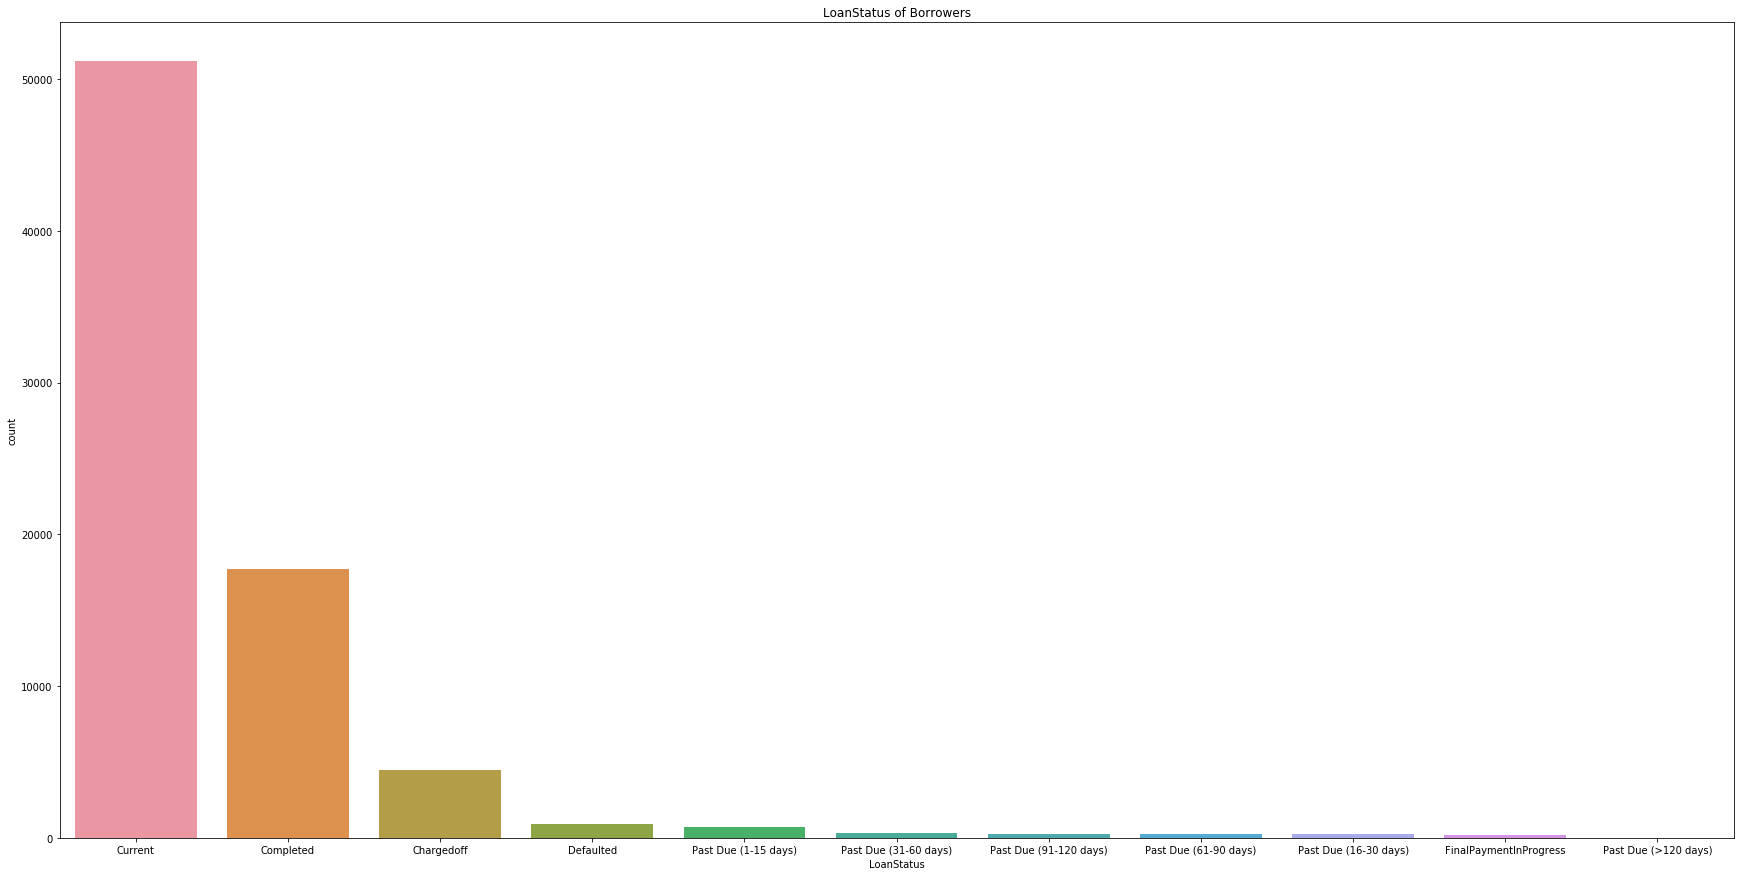

In [47]:
plt.figure(figsize = [30, 15]) 
plt.title("LoanStatus of Borrowers")
sb.countplot(data = df_loan, x = 'LoanStatus',
             order = df_loan['LoanStatus'].value_counts().index);

 Observations **LoanStatus is shown here and maximum loan status is ongoing/current for people it is maximum in current and graph is shows minimum is in past due more than 120 days**

In [24]:
df_loan.EmploymentStatus.value_counts()

Employed         65883
Full-time         7577
Other             2194
Retired            320
Part-time          199
Self-employed       42
Not employed         1
Name: EmploymentStatus, dtype: int64

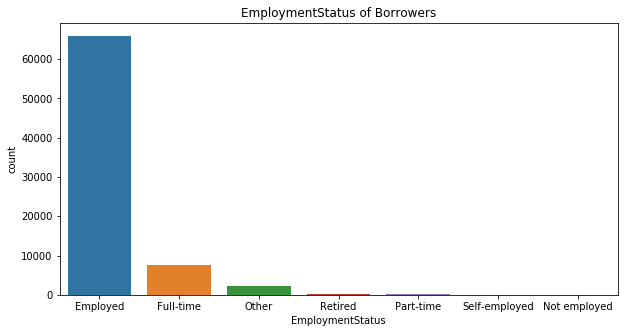

In [25]:
plt.figure(figsize = [10, 5]) 
plt.title("EmploymentStatus of Borrowers")
sb.countplot(data = df_loan, x = 'EmploymentStatus',
             order = df_loan['EmploymentStatus'].value_counts().index);

Obersation **Employment status of borrower is maximum is employed and also this and lowest in unemployed which become a very major factor in deciding if loan has to be given or not**

In [26]:
df_loan.BorrowerState.value_counts()

CA    9574
NY    5184
TX    5086
FL    4738
IL    3871
OH    3061
GA    3006
VA    2530
NJ    2463
PA    2416
MI    2349
NC    2194
MD    2066
WA    1925
MA    1696
MO    1590
MN    1554
CO    1539
IN    1518
TN    1396
CT    1371
WI    1359
AZ    1237
AL    1085
OR    1045
NV     916
SC     872
KY     804
KS     775
LA     768
AR     689
OK     665
MS     600
NE     496
UT     441
NH     410
RI     376
ID     348
DC     310
HI     307
NM     293
WV     274
DE     253
MT     192
SD     165
VT     151
AK     150
WY     108
Name: BorrowerState, dtype: int64

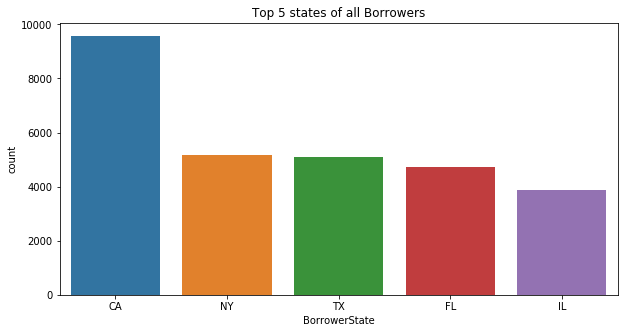

In [27]:
plt.figure(figsize = [10, 5]) 
sb.countplot(data = df_loan, x = 'BorrowerState',
             order = df_loan['BorrowerState'].value_counts().head(5).index );
plt.title("Top 5 states of all Borrowers");

**State Borrowers is maximum in CA NY they are the largest states of all Borowers here th maximum is Canada ie CA**

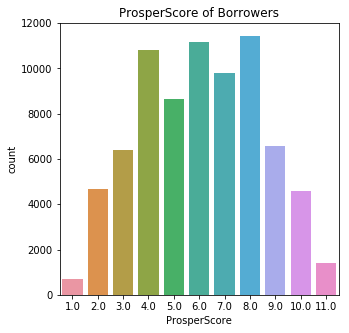

In [28]:
plt.figure(figsize = [5, 5]) 
sb.countplot(data = df_loan, x = 'ProsperScore');
plt.title("ProsperScore of Borrowers");

Observation **ProsperScore has a Peak Around 8 the prosper score help in determing a score of the borrower i.e it plays a major role in proving loan**

## BELOW VISUALISED GRAPH ARE NUMERIC ATTRIBUTES##

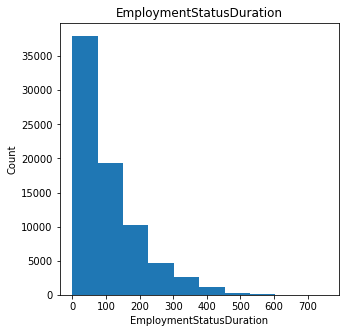

In [29]:
plt.figure(figsize = [5, 5]) 
plt.hist(data = df_loan, x = 'EmploymentStatusDuration');
plt.xlabel('EmploymentStatusDuration');
plt.ylabel('Count');
plt.title("EmploymentStatusDuration");

 observation **Here the graph is right skewed also the graph represents the peak in the 0-100 observations only**

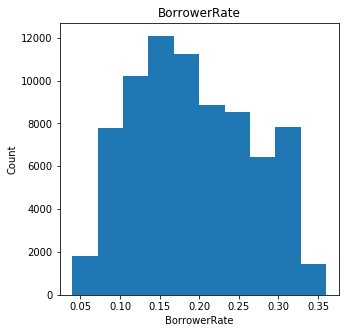

In [30]:
plt.figure(figsize = [5, 5]) 
plt.hist(data = df_loan, x = 'BorrowerRate');
plt.xlabel('BorrowerRate');
plt.ylabel('Count');
plt.title("BorrowerRate");

observation **the Graph is unimodal and the distribution Most of the Borrower Rate are concentrated between 0.1 and 0.2. There is also another lower concentration between 0.2 and 0.3. A borrower rate a little above 0.3 has the highest values**

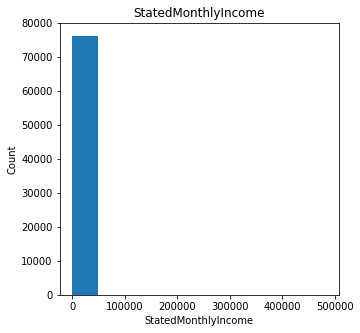

In [31]:
plt.figure(figsize = [5, 5]) 
plt.hist(data = df_loan, x = 'StatedMonthlyIncome');
plt.xlabel('StatedMonthlyIncome');
plt.ylabel('Count');
plt.title("StatedMonthlyIncome");

obvervation **StateMonthlyIncome is in between 0 to 1 lakh this helps us in determining whether monthy income plays a role in deciding the a loan has to be given or not**

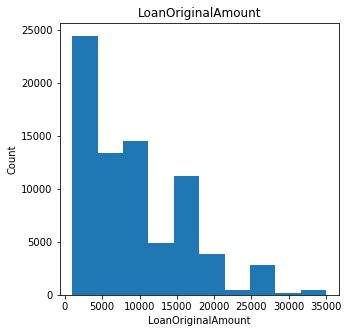

In [32]:
plt.figure(figsize = [5, 5]) 
plt.hist(data = df_loan, x = 'LoanOriginalAmount');
plt.xlabel('LoanOriginalAmount');
plt.ylabel('Count');
plt.title("LoanOriginalAmount");

 observation **LoanOriginalAmount is right skewed 5000 has the most loans there is decrease in count  with increase in loan amount**

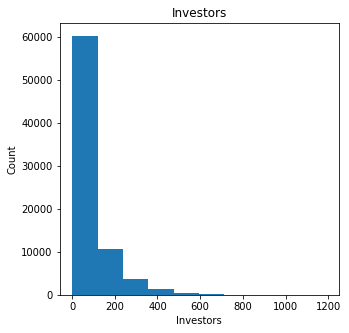

In [33]:
plt.figure(figsize = [5, 5]) 
plt.hist(data = df_loan, x = 'Investors');
plt.xlabel('Investors');
plt.ylabel('Count');
plt.title("Investors");

 observation **Invertors are almost null in 700 and above range the invertors are maximum in range of 0-200 ans also the graph is right skewed**

## Univariate Analysis##

loans with AA category are really less

employment status of borrowers are Employed

Top 2 borrower state are CA is canada ,NY ie newyork

BorrowerRate have a peak Around 0.15.

LoanOriginalAmount is right skewed

Invertors are almost null in 700 and above range


## Bivariate##

In [34]:
df_loan.head()

,Term,LoanStatus,EstimatedEffectiveYield,BorrowerState,BorrowerAPR,BorrowerRate,ProsperRating_N,ProsperRating_A,ProsperScore,ListingCategory_N,...,IsBorrowerHomeowner,IncomeVerifiable,StatedMonthlyIncome,MonthlyLoanPayment,Recommendations,DebtToIncomeRatio,LoanOriginalAmount,PercentFunded,IncomeRange,Investors
1,36,Current,0.07960,CO,0.12016,0.0920,6.0,A,7.0,2,...,False,True,6125.000000,318.93,0,0.18,10000,1.0,"$50,000-74,999",1
3,36,Current,0.08490,GA,0.12528,0.0974,6.0,A,9.0,16,...,True,True,2875.000000,321.45,0,0.15,10000,1.0,"$25,000-49,999",158
4,36,Current,0.18316,MN,0.24614,0.2085,3.0,D,4.0,2,...,True,True,9583.333333,563.97,0,0.26,15000,1.0,"$100,000+",20
5,60,Current,0.11567,NM,0.15425,0.1314,5.0,B,10.0,1,...,True,True,8333.333333,342.37,0,0.36,15000,1.0,"$100,000+",1
6,36,Current,0.23820,KS,0.31032,0.2712,2.0,E,2.0,1,...,False,True,2083.333333,122.67,0,0.27,3000,1.0,"$25,000-49,999",1


In [35]:
n_var = ['EstimatedEffectiveYield', 'BorrowerAPR', 'BorrowerRate',
                 'ProsperScore', 
                'EmploymentStatusDuration', 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'Recommendations', 'DebtToIncomeRatio', 'LoanOriginalAmount','PercentFunded', 'Investors',
                 'BorrowerRate','ProsperScore',                 
                'StatedMonthlyIncome', 'MonthlyLoanPayment',
                'LoanOriginalAmount', 'Investors']
c_var = ['LoanStatus', 'ProsperRating_A', 'EmploymentStatus', 'Occupation',
       'IncomeRange', 'BorrowerState', 'Term', 'IsBorrowerHomeowner']

**What is Relationship between numeric variables**

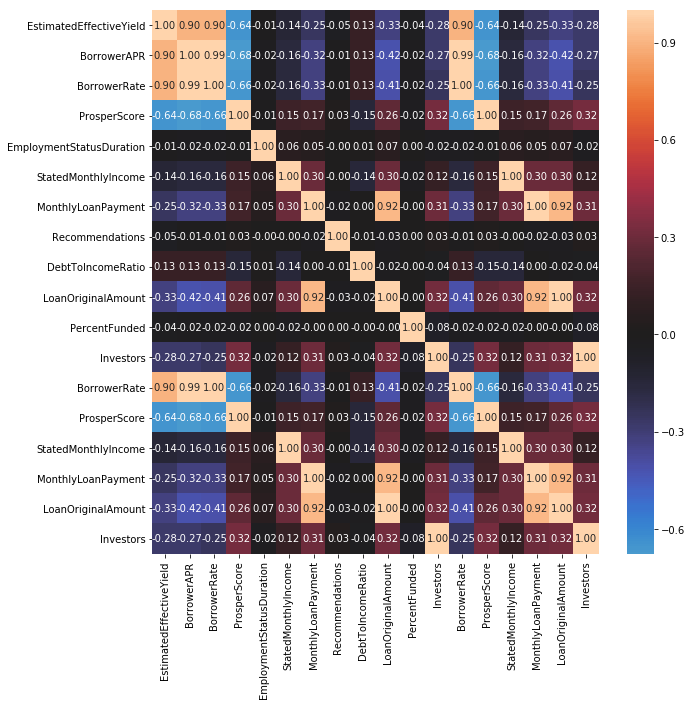

In [62]:
plt.figure(figsize = [10, 10])
sb.heatmap(df_loan[n_var].corr(), annot = True, fmt = '.2f',
            center = 0)
plt.show()

**Heat Plot gives us relationship between all the numeric variables with on another the corelation is in range of 1 to -0.6**

**What is Relationship between numeric and categorial variables**

<Figure size 720x720 with 0 Axes>

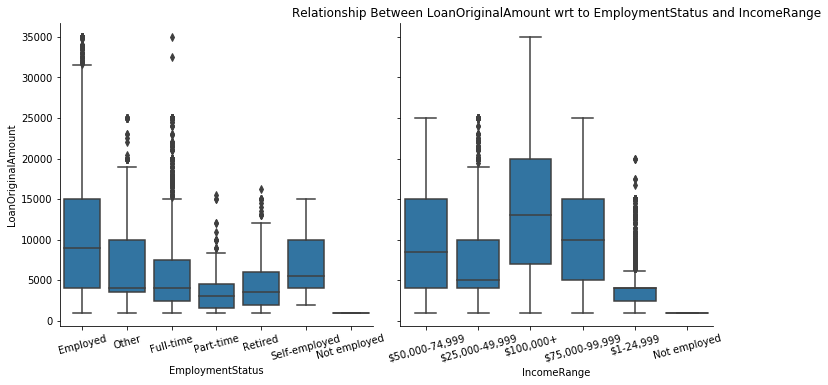

In [63]:
c_var_1 = ['EmploymentStatus', 'IncomeRange']
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 15)
    

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_loan, y_vars = [ 'LoanOriginalAmount'], 
                x_vars = c_var_1, height = 5)

g.map(boxgrid);
plt.title("Relationship Between LoanOriginalAmount wrt to EmploymentStatus and IncomeRange");
plt.xticks(rotation = 15);
plt.show();

OBSERVATION **Majority of the loan applying people earn from 50K to 75K range with emloyeed status.the employment status shows that the loan amount is null for unemployed which becomes a very major reason in giving loan**

**What is relationship between Income Range vs Loan Amount**

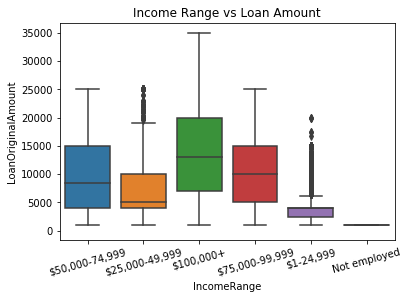

In [49]:
plt.plot(1, 2, 2)
plt.title('Income Range vs Loan Amount')
sb.boxplot(data = df_loan, x = 'IncomeRange', y = 'LoanOriginalAmount') 
plt.xticks(rotation = 15);


observation **Majority of the loan applying people earn from 50K to 75K range with emloyeed status the unemployed has null loan amount.**

<Figure size 720x720 with 0 Axes>

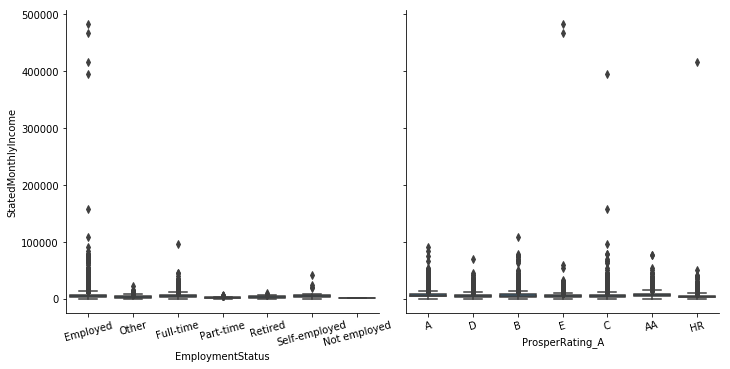

In [46]:
c_var_1 = ['EmploymentStatus', 'ProsperRating_A']
def boxgrid(x, y, **kwargs):
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)
    plt.xticks(rotation = 15)
    

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_loan, y_vars = [ 'StatedMonthlyIncome'], 
                x_vars = c_var_1, height = 5)

g.map(boxgrid);
plt.xticks(rotation = 15)
plt.show();

OBSERVATION **Borrowers are related to employed people are most loan takers are employed we can see the peak in employed**


**What is Relationship between Categorical attributes**

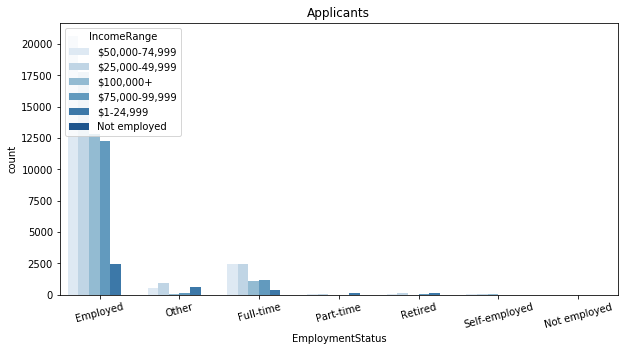

In [57]:
plt.figure(figsize = [10, 5])
sb.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Blues')
plt.xticks(rotation = 15)
plt.title('Applicants')
plt.show();

**income range of the employer people are maximum and the count is also maximum in range of 50000-75k**

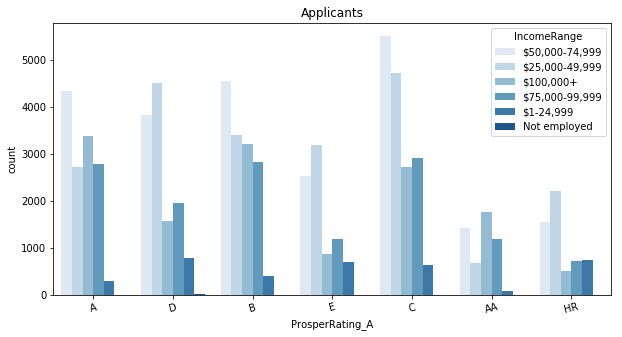

In [54]:
plt.figure(figsize = [10, 5])
sb.countplot(data = df_loan, x = 'ProsperRating_A', hue = 'IncomeRange', palette = 'Blues')
plt.xticks(rotation = 15)
plt.title('Applicants')
plt.show();

**people earning incomerange of 50K to 75K range have their prosper rating under AA, A, B and C**

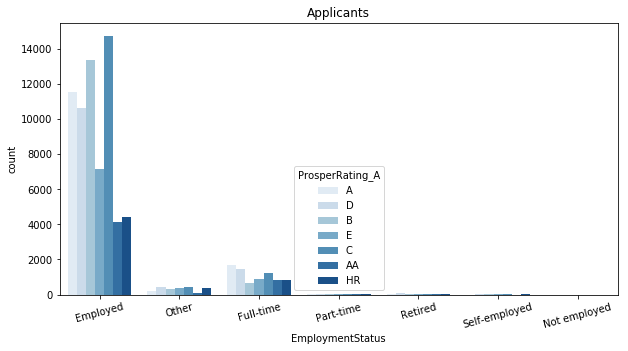

In [60]:
plt.figure(figsize = [10, 5])
sb.countplot(data = df_loan, x = 'EmploymentStatus', hue = 'ProsperRating_A', palette = 'Blues' )
plt.xticks(rotation = 15)
plt.title('Applicants')
plt.show();

**employed people have higher prosperating in all feilds in which c has a maximum rating being employed increase the over all prosperrating**

## Analysis Bivariate##

Borrowers are related to employed people are most loan takers are employed

Salary is higher for borrowers

Majority of the loan applying people earn from 50K to 75K range with emloyeed status

people earning incomerange of 50K to 75K range have their prosper rating under AA, A, B and C

LoanOriginalAmount is Maximum for A and B Prosper ratings


## MULTIVARIATE ##

**Does Homeowner status impact Interest Rate and ProsperRating**

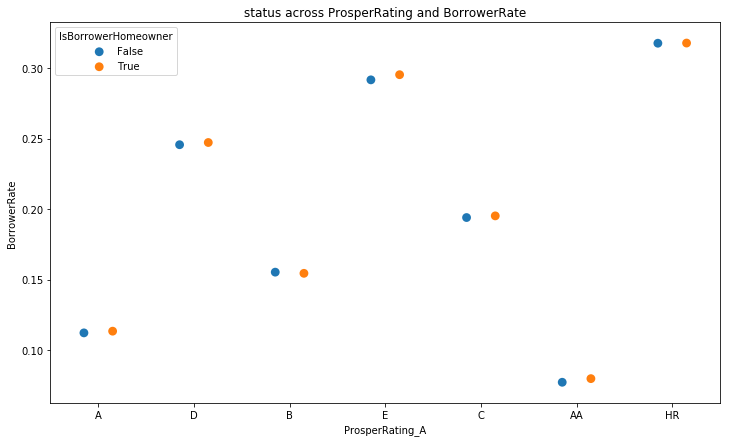

In [43]:
plt.figure(figsize = [12, 7])
ax = sb.pointplot(data = df_loan, x = 'ProsperRating_A', y = 'BorrowerRate', hue = 'IsBorrowerHomeowner',
                  dodge = 0.3, linestyles = "");
plt.title(' status across ProsperRating and BorrowerRate ');

OBSERVATION **The monthly income of borrowers are higher values for employed, other and full time employment status of the prosper rating of AA, A and B**

**Status of employment depend on the monthly income and Rating**

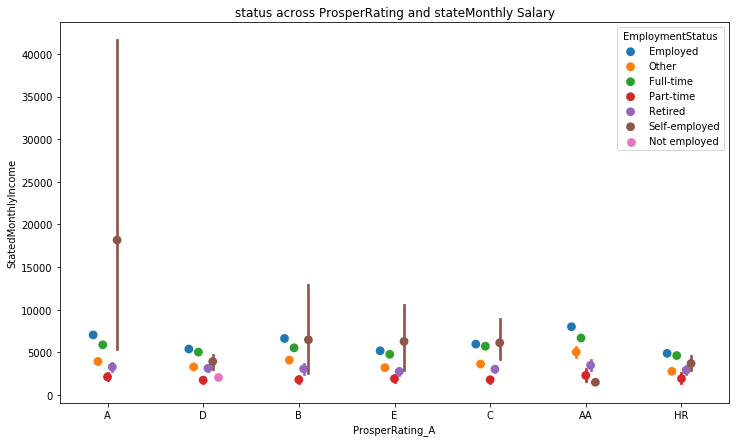

In [44]:
plt.figure(figsize = [12, 7])
ax = sb.pointplot(data = df_loan, x = 'ProsperRating_A', y = 'StatedMonthlyIncome', hue = 'EmploymentStatus',
                  dodge = 0.3, linestyles = "");
plt.title(' status across ProsperRating and stateMonthly Salary ');

OBSERVATION **stated monthly income is maximum for all prosperating in self-employed people also the number of self employed people is maximum in A**

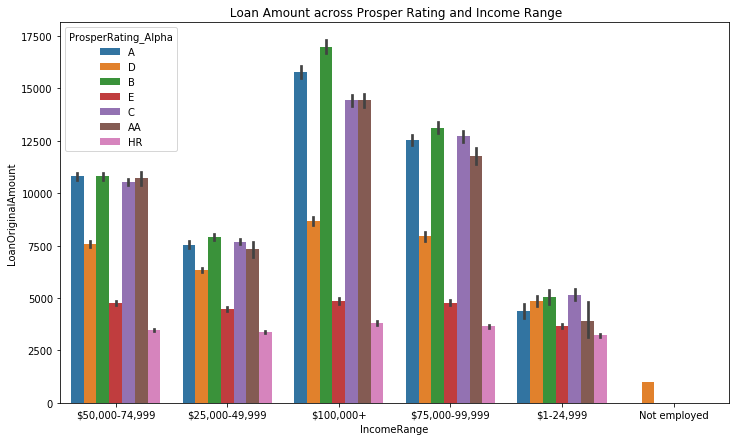

In [61]:
plt.figure(figsize = [12, 7])

ax = sb.barplot(data = df_loan, y = 'LoanOriginalAmount', x = 'IncomeRange', hue = 'ProsperRating_A')
ax.legend( title = 'ProsperRating_Alpha')
plt.title(' Loan Amount across Prosper Rating and Income Range');

Observation **the loan approval status dependent on the applicant's information on IncomeRange, employment status.**

## Multivariate analysis ##
 
 The monthly income of borrowers are higher values for employed, other and full time employment status  of  the prosper rating of AA, A and B
 
## To conclude , I say that the loan approval status  dependent on the applicant's information on IncomeRange,  employment status.##